Thermal Expansion for BB84 H gate for 0 - 2nd November 2021

In [27]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_armonk')
backend.properties()

ibmqfactory.load_account:WARNING:2021-11-03 09:57:21,102: Credentials are already in use. The existing account in the session will be replaced.


In [28]:
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import pauli_error

from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
#import matplotlib.pyplot as plt

def make_noise_therm(p_m,p_g):

    T1 = 142370 # in nano second, basically 54 micro second
    T2 = 209610 # in nano second, basically 44 micro second

    # Gate operation time in nano second
    time_h = 71.11
    time_x = 71.11
    time_id = 71.11
    time_measure = 4977.778

    # probability of bit flip error after each gate

    error_measure = thermal_relaxation_error(T1,T2,time_measure)
    error_m = pauli_error([('X',p_m),('I',1-p_m)])
    
    error_gate1 = thermal_relaxation_error(T1,T2,time_x)
    error_bit1 = depolarizing_error(p_g,1)
    error_bit2 = error_bit1.tensor(error_bit1)

    noise_model = noise.NoiseModel()

    noise_model.add_all_qubit_quantum_error(error_measure, "measure")
    noise_model.add_all_qubit_quantum_error(error_m, "measure")
    noise_model.add_all_qubit_quantum_error(error_gate1, "relaxation single gate")
    noise_model.add_all_qubit_quantum_error(error_bit1, ["h","x","id"])
    
    return noise_model

In [29]:
from qiskit.tools.monitor import backend_monitor
from qiskit import *
from qiskit.visualization import plot_histogram
from random import randrange, seed, sample
from sys import argv, exit
import random
y_list=[]
#data = int(input('ENTER LENGTH OF BIT STREAM (example 5 For 10110):'))
for z in range(20):
    data=100
    ##########################################################################
    h=0
    #h=int(input())
    def bit_stream(p):
        key1 = ""
        for i in range(p):
            temp = str(random.randint(h,h))
            key1 += temp
        return(key1)
    
    bitstream= bit_stream(data)
    digits = [int(x) for x in str(bitstream)]
    print(digits)
    ##########################################################################
    #print('List of Bit Stream to transfer over Quantum Channel')
    #print(digits)
    print('\n')
    #n = len(digits)
    
    ##########################################################################
    bob_bits=[]
    from random import choice
    m=0
    n=100
    for i in range(n):
        m=m+10
        #print("No of identity Gate:",m)
        if digits[i] == 0:
            q = QuantumRegister(1, 'q')
            c = ClassicalRegister(1, 'c')
            qc = QuantumCircuit(q, c)
            qc.barrier()
            qc.h(0)
            qc.barrier()
            for j in range(m):
                qc.id(0)
                qc.barrier()
            qc.h(0)
            qc.barrier()
            qc.measure(q[0], c[0])
            #print(qc)
            # Perform a noise simulation
            backend = Aer.get_backend('qasm_simulator')
            counts = backend.run(qc,Aer.get_backend('qasm_simulator'),shots=8192,noise_model=make_noise_therm(0.034,0.0003521)).result().get_counts()
            #counts = result.get_counts(qc)
            %matplotlib inline
            #print(qc)
            #qc.draw(output='mpl')
            #plt.show()
            #print(counts)
            #plot_histogram(counts)
            
            itemMaxValue = max(counts.items(), key=lambda x : x[1])
            #print(itemMaxValue)
            # Iterate over all the items in dictionary to find keys with max value
            for key, value in counts.items():
                if value == itemMaxValue[1]:
                    bob_bits.append(value/8192)
    y_list.append(bob_bits)
    print(bob_bits)
    print("")
print(y_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]




[0.9676513671875, 0.959716796875, 0.95703125, 0.960693359375, 0.9599609375, 0.9588623046875, 0.953369140625, 0.9527587890625, 0.956298828125, 0.947021484375, 0.94775390625, 0.9451904296875, 0.942626953125, 0.9464111328125, 0.9439697265625, 0.942626953125, 0.941650390625, 0.93408203125, 0.935791015625, 0.9326171875, 0.93017578125, 0.9364013671875, 0.9298095703125, 0.93408203125, 0.926513671875, 0.9273681640625, 0.922607421875, 0.925048828125, 0.9249267578125, 0.9173583984375, 0.91552734375, 0.9266357421875, 0.91650390625, 0.9124755859375, 0.908935546875, 0.9080810546875, 0.908447265625, 0.9111328125, 0.90869140625, 0.9085693359375, 0.9029541015625, 0.9090576171875, 0.9046630859375, 0.902587890625, 0.8966064453125, 0.8973388671875, 0.90234375, 0.8983154296875, 0.896484375, 0.8984375, 0.893798828125, 0.8873291015625, 0.889404296875, 0.8863525390625, 0.8870849609375, 0.89013671875, 0.88330078125, 0.880126953125, 0.8829345703125, 0.88232421875, 0.8831787109375, 0.8743896484375, 0.8756103515

[0.9619140625, 0.9632568359375, 0.9599609375, 0.9593505859375, 0.9608154296875, 0.9534912109375, 0.9566650390625, 0.952880859375, 0.9517822265625, 0.947509765625, 0.94873046875, 0.9481201171875, 0.941162109375, 0.9461669921875, 0.9456787109375, 0.93896484375, 0.9339599609375, 0.9351806640625, 0.936767578125, 0.9346923828125, 0.93115234375, 0.9332275390625, 0.9312744140625, 0.932861328125, 0.92529296875, 0.9296875, 0.93017578125, 0.923095703125, 0.926513671875, 0.9249267578125, 0.9193115234375, 0.9195556640625, 0.9215087890625, 0.915283203125, 0.909912109375, 0.9173583984375, 0.9136962890625, 0.9127197265625, 0.905029296875, 0.910400390625, 0.907470703125, 0.9013671875, 0.8997802734375, 0.90185546875, 0.8983154296875, 0.8980712890625, 0.8958740234375, 0.8951416015625, 0.8966064453125, 0.8924560546875, 0.892333984375, 0.8878173828125, 0.89013671875, 0.8837890625, 0.891357421875, 0.8868408203125, 0.8834228515625, 0.88037109375, 0.8809814453125, 0.8809814453125, 0.880126953125, 0.883544921

[0.9639892578125, 0.960693359375, 0.960205078125, 0.9600830078125, 0.9549560546875, 0.957763671875, 0.9552001953125, 0.957763671875, 0.9544677734375, 0.9481201171875, 0.94921875, 0.9466552734375, 0.9422607421875, 0.9422607421875, 0.94482421875, 0.9405517578125, 0.9417724609375, 0.94189453125, 0.935791015625, 0.9368896484375, 0.9349365234375, 0.936767578125, 0.923583984375, 0.9342041015625, 0.9296875, 0.9290771484375, 0.92333984375, 0.9232177734375, 0.9166259765625, 0.9224853515625, 0.915771484375, 0.9232177734375, 0.916015625, 0.9139404296875, 0.9105224609375, 0.9051513671875, 0.908203125, 0.9114990234375, 0.911865234375, 0.9063720703125, 0.900634765625, 0.8995361328125, 0.8990478515625, 0.89208984375, 0.89697265625, 0.900146484375, 0.8994140625, 0.894775390625, 0.8927001953125, 0.8905029296875, 0.8916015625, 0.8905029296875, 0.8880615234375, 0.884765625, 0.886474609375, 0.8851318359375, 0.8826904296875, 0.8837890625, 0.8785400390625, 0.875732421875, 0.8758544921875, 0.876220703125, 0.

[0.9642333984375, 0.9610595703125, 0.96142578125, 0.9556884765625, 0.95703125, 0.9569091796875, 0.956298828125, 0.9508056640625, 0.9515380859375, 0.9534912109375, 0.951904296875, 0.9468994140625, 0.9412841796875, 0.948486328125, 0.9404296875, 0.9342041015625, 0.9390869140625, 0.9393310546875, 0.9365234375, 0.9320068359375, 0.9346923828125, 0.930908203125, 0.9310302734375, 0.9251708984375, 0.921142578125, 0.921142578125, 0.9239501953125, 0.919677734375, 0.92236328125, 0.91552734375, 0.9139404296875, 0.9151611328125, 0.910400390625, 0.9189453125, 0.9163818359375, 0.9105224609375, 0.9146728515625, 0.905517578125, 0.906005859375, 0.91162109375, 0.90087890625, 0.9053955078125, 0.898681640625, 0.9000244140625, 0.904052734375, 0.89599609375, 0.8955078125, 0.896728515625, 0.8948974609375, 0.8900146484375, 0.8887939453125, 0.8929443359375, 0.8924560546875, 0.884033203125, 0.883056640625, 0.8773193359375, 0.879150390625, 0.8765869140625, 0.8753662109375, 0.8798828125, 0.880859375, 0.87841796875,

[0.9656982421875, 0.9639892578125, 0.9632568359375, 0.9613037109375, 0.958984375, 0.95703125, 0.9578857421875, 0.9522705078125, 0.9512939453125, 0.9498291015625, 0.94873046875, 0.9478759765625, 0.9447021484375, 0.942138671875, 0.9442138671875, 0.939208984375, 0.940673828125, 0.937744140625, 0.934326171875, 0.932861328125, 0.9354248046875, 0.92919921875, 0.9241943359375, 0.9281005859375, 0.9229736328125, 0.93017578125, 0.9219970703125, 0.9254150390625, 0.921875, 0.9217529296875, 0.9178466796875, 0.91455078125, 0.9219970703125, 0.9149169921875, 0.916748046875, 0.914794921875, 0.9088134765625, 0.90576171875, 0.9024658203125, 0.9029541015625, 0.907470703125, 0.9088134765625, 0.8984375, 0.90625, 0.898193359375, 0.9014892578125, 0.9013671875, 0.900634765625, 0.895263671875, 0.8946533203125, 0.890869140625, 0.892578125, 0.8846435546875, 0.8856201171875, 0.8836669921875, 0.8868408203125, 0.8863525390625, 0.881591796875, 0.8856201171875, 0.8814697265625, 0.8819580078125, 0.88427734375, 0.875976

[0.9649658203125, 0.9610595703125, 0.96142578125, 0.9580078125, 0.9583740234375, 0.9541015625, 0.955322265625, 0.951171875, 0.9512939453125, 0.947265625, 0.9522705078125, 0.9482421875, 0.94482421875, 0.93994140625, 0.9412841796875, 0.9393310546875, 0.9429931640625, 0.9366455078125, 0.9361572265625, 0.937255859375, 0.93505859375, 0.933837890625, 0.9365234375, 0.9305419921875, 0.92919921875, 0.9251708984375, 0.9239501953125, 0.9217529296875, 0.9217529296875, 0.9183349609375, 0.920654296875, 0.9200439453125, 0.9237060546875, 0.91552734375, 0.914794921875, 0.90966796875, 0.9083251953125, 0.9154052734375, 0.9071044921875, 0.9039306640625, 0.903076171875, 0.9019775390625, 0.9029541015625, 0.90283203125, 0.8990478515625, 0.89404296875, 0.890869140625, 0.8968505859375, 0.8909912109375, 0.893310546875, 0.893310546875, 0.886474609375, 0.893798828125, 0.8868408203125, 0.8863525390625, 0.89208984375, 0.876953125, 0.88037109375, 0.887939453125, 0.881103515625, 0.88330078125, 0.8826904296875, 0.8759

[0.9642333984375, 0.963134765625, 0.9566650390625, 0.956787109375, 0.9588623046875, 0.95556640625, 0.9569091796875, 0.947265625, 0.9501953125, 0.952392578125, 0.95263671875, 0.9503173828125, 0.950439453125, 0.9476318359375, 0.9459228515625, 0.940185546875, 0.9404296875, 0.9359130859375, 0.9302978515625, 0.9345703125, 0.93310546875, 0.93505859375, 0.927734375, 0.927734375, 0.9259033203125, 0.92041015625, 0.9266357421875, 0.9173583984375, 0.92138671875, 0.91650390625, 0.91943359375, 0.91650390625, 0.9130859375, 0.9139404296875, 0.911865234375, 0.9129638671875, 0.9080810546875, 0.916259765625, 0.908935546875, 0.902587890625, 0.9044189453125, 0.9036865234375, 0.906005859375, 0.901123046875, 0.8951416015625, 0.899658203125, 0.8919677734375, 0.8961181640625, 0.8985595703125, 0.8931884765625, 0.8955078125, 0.8951416015625, 0.8887939453125, 0.8876953125, 0.887939453125, 0.885009765625, 0.887451171875, 0.8822021484375, 0.8802490234375, 0.88720703125, 0.878662109375, 0.879150390625, 0.8696289062

[0.967529296875, 0.96435546875, 0.9610595703125, 0.963134765625, 0.957275390625, 0.955078125, 0.9534912109375, 0.9501953125, 0.9530029296875, 0.9534912109375, 0.9481201171875, 0.94580078125, 0.9423828125, 0.942138671875, 0.9422607421875, 0.9443359375, 0.9376220703125, 0.9384765625, 0.9371337890625, 0.93310546875, 0.9329833984375, 0.935791015625, 0.931396484375, 0.9326171875, 0.9259033203125, 0.9228515625, 0.924072265625, 0.9217529296875, 0.9212646484375, 0.9232177734375, 0.9207763671875, 0.9173583984375, 0.9144287109375, 0.9189453125, 0.9117431640625, 0.9146728515625, 0.9130859375, 0.914794921875, 0.911376953125, 0.9053955078125, 0.9052734375, 0.903564453125, 0.8994140625, 0.9068603515625, 0.9051513671875, 0.903564453125, 0.8895263671875, 0.89892578125, 0.893310546875, 0.8895263671875, 0.8968505859375, 0.890380859375, 0.8900146484375, 0.8863525390625, 0.879150390625, 0.8853759765625, 0.8857421875, 0.882568359375, 0.878173828125, 0.8851318359375, 0.884765625, 0.875732421875, 0.875, 0.87

[0.965087890625, 0.964111328125, 0.9620361328125, 0.9566650390625, 0.955322265625, 0.955810546875, 0.955322265625, 0.956787109375, 0.9464111328125, 0.9505615234375, 0.9520263671875, 0.947509765625, 0.947998046875, 0.945068359375, 0.9454345703125, 0.9429931640625, 0.9400634765625, 0.9332275390625, 0.9324951171875, 0.934326171875, 0.9315185546875, 0.9287109375, 0.9361572265625, 0.92919921875, 0.923828125, 0.9195556640625, 0.9254150390625, 0.9151611328125, 0.924560546875, 0.91845703125, 0.9193115234375, 0.9151611328125, 0.9156494140625, 0.910888671875, 0.914794921875, 0.9107666015625, 0.9102783203125, 0.91064453125, 0.9088134765625, 0.909912109375, 0.904541015625, 0.89599609375, 0.8995361328125, 0.898681640625, 0.901123046875, 0.8948974609375, 0.898681640625, 0.8929443359375, 0.893798828125, 0.8912353515625, 0.8892822265625, 0.89111328125, 0.8824462890625, 0.8875732421875, 0.8919677734375, 0.883544921875, 0.88232421875, 0.885498046875, 0.8829345703125, 0.8778076171875, 0.8831787109375, 0.

[0.965087890625, 0.95849609375, 0.960205078125, 0.960693359375, 0.9595947265625, 0.958740234375, 0.95849609375, 0.953857421875, 0.94970703125, 0.9521484375, 0.94775390625, 0.9456787109375, 0.946044921875, 0.943115234375, 0.9425048828125, 0.9422607421875, 0.937744140625, 0.9405517578125, 0.9375, 0.9337158203125, 0.9285888671875, 0.9356689453125, 0.92919921875, 0.928466796875, 0.9327392578125, 0.9285888671875, 0.92529296875, 0.92724609375, 0.92333984375, 0.92041015625, 0.92431640625, 0.921142578125, 0.917236328125, 0.9188232421875, 0.91943359375, 0.9149169921875, 0.9134521484375, 0.9085693359375, 0.90576171875, 0.903076171875, 0.9027099609375, 0.8997802734375, 0.898681640625, 0.90185546875, 0.8968505859375, 0.8975830078125, 0.894287109375, 0.890625, 0.89697265625, 0.8929443359375, 0.89111328125, 0.8895263671875, 0.887451171875, 0.885498046875, 0.8909912109375, 0.8907470703125, 0.8916015625, 0.87939453125, 0.8824462890625, 0.87451171875, 0.8778076171875, 0.8707275390625, 0.88232421875, 0.

[0.9620361328125, 0.962646484375, 0.960205078125, 0.9615478515625, 0.95849609375, 0.9541015625, 0.9561767578125, 0.9541015625, 0.951416015625, 0.94873046875, 0.9488525390625, 0.9456787109375, 0.9447021484375, 0.947265625, 0.9395751953125, 0.940185546875, 0.9403076171875, 0.935302734375, 0.9327392578125, 0.931640625, 0.93310546875, 0.9344482421875, 0.9361572265625, 0.92822265625, 0.9222412109375, 0.923095703125, 0.9283447265625, 0.9273681640625, 0.9227294921875, 0.9259033203125, 0.92138671875, 0.917724609375, 0.920166015625, 0.917724609375, 0.908203125, 0.9046630859375, 0.90625, 0.912353515625, 0.90283203125, 0.9088134765625, 0.9091796875, 0.90869140625, 0.904052734375, 0.897705078125, 0.900390625, 0.8919677734375, 0.8994140625, 0.8919677734375, 0.8912353515625, 0.8941650390625, 0.8912353515625, 0.8944091796875, 0.8861083984375, 0.8902587890625, 0.8778076171875, 0.8907470703125, 0.8853759765625, 0.88037109375, 0.888671875, 0.8824462890625, 0.87841796875, 0.8773193359375, 0.8739013671875

[0.965087890625, 0.960205078125, 0.9620361328125, 0.9571533203125, 0.9593505859375, 0.9571533203125, 0.9561767578125, 0.949951171875, 0.9515380859375, 0.9466552734375, 0.94921875, 0.9498291015625, 0.9456787109375, 0.94140625, 0.9384765625, 0.9417724609375, 0.935546875, 0.93701171875, 0.935546875, 0.9344482421875, 0.93408203125, 0.932861328125, 0.932373046875, 0.9268798828125, 0.932373046875, 0.927490234375, 0.922607421875, 0.922119140625, 0.920166015625, 0.9202880859375, 0.9176025390625, 0.9163818359375, 0.9161376953125, 0.9163818359375, 0.917724609375, 0.914306640625, 0.9134521484375, 0.91064453125, 0.9046630859375, 0.909912109375, 0.9100341796875, 0.8997802734375, 0.898193359375, 0.89892578125, 0.906494140625, 0.9052734375, 0.89208984375, 0.8936767578125, 0.8924560546875, 0.8956298828125, 0.89453125, 0.88916015625, 0.8873291015625, 0.89306640625, 0.8931884765625, 0.8856201171875, 0.8875732421875, 0.880859375, 0.8785400390625, 0.877685546875, 0.8770751953125, 0.876953125, 0.8737792968

[0.9642333984375, 0.960205078125, 0.9609375, 0.9610595703125, 0.9559326171875, 0.9541015625, 0.9549560546875, 0.9559326171875, 0.9564208984375, 0.950439453125, 0.947998046875, 0.949462890625, 0.94482421875, 0.951171875, 0.9415283203125, 0.940673828125, 0.9388427734375, 0.93701171875, 0.9381103515625, 0.933837890625, 0.92919921875, 0.93212890625, 0.9332275390625, 0.9293212890625, 0.9288330078125, 0.9266357421875, 0.9228515625, 0.9248046875, 0.9241943359375, 0.9207763671875, 0.91552734375, 0.9197998046875, 0.9229736328125, 0.9068603515625, 0.9110107421875, 0.912109375, 0.90869140625, 0.9119873046875, 0.90966796875, 0.908935546875, 0.9061279296875, 0.90576171875, 0.9049072265625, 0.898193359375, 0.9051513671875, 0.9007568359375, 0.89990234375, 0.8973388671875, 0.894287109375, 0.8966064453125, 0.891845703125, 0.890869140625, 0.88720703125, 0.8853759765625, 0.8858642578125, 0.8841552734375, 0.8790283203125, 0.8836669921875, 0.878173828125, 0.880126953125, 0.8828125, 0.8690185546875, 0.87255

[0.9647216796875, 0.9649658203125, 0.9627685546875, 0.9552001953125, 0.9559326171875, 0.9537353515625, 0.951904296875, 0.955078125, 0.9530029296875, 0.94775390625, 0.9476318359375, 0.943603515625, 0.9451904296875, 0.94873046875, 0.9423828125, 0.9393310546875, 0.9405517578125, 0.9381103515625, 0.9332275390625, 0.9390869140625, 0.9364013671875, 0.9361572265625, 0.92724609375, 0.9249267578125, 0.928466796875, 0.924072265625, 0.92529296875, 0.9222412109375, 0.9193115234375, 0.9249267578125, 0.91357421875, 0.9176025390625, 0.91357421875, 0.917236328125, 0.9161376953125, 0.9068603515625, 0.905517578125, 0.911376953125, 0.9102783203125, 0.9058837890625, 0.9049072265625, 0.9063720703125, 0.9039306640625, 0.906005859375, 0.901123046875, 0.8995361328125, 0.89013671875, 0.8970947265625, 0.89453125, 0.891357421875, 0.88916015625, 0.89501953125, 0.887451171875, 0.8892822265625, 0.88232421875, 0.8931884765625, 0.8846435546875, 0.8824462890625, 0.8812255859375, 0.8804931640625, 0.8812255859375, 0.877

[0.9600830078125, 0.9599609375, 0.960205078125, 0.9576416015625, 0.957275390625, 0.96044921875, 0.95263671875, 0.95361328125, 0.9488525390625, 0.9456787109375, 0.949951171875, 0.943603515625, 0.94677734375, 0.94482421875, 0.944091796875, 0.9388427734375, 0.939453125, 0.9403076171875, 0.9383544921875, 0.9285888671875, 0.93701171875, 0.930908203125, 0.9326171875, 0.93115234375, 0.9290771484375, 0.9283447265625, 0.92724609375, 0.92626953125, 0.9202880859375, 0.915283203125, 0.916015625, 0.9161376953125, 0.9189453125, 0.9161376953125, 0.9078369140625, 0.9146728515625, 0.90625, 0.91064453125, 0.9097900390625, 0.907470703125, 0.9080810546875, 0.902587890625, 0.901611328125, 0.9013671875, 0.8985595703125, 0.8988037109375, 0.896484375, 0.89306640625, 0.89306640625, 0.8941650390625, 0.88818359375, 0.892333984375, 0.890380859375, 0.884033203125, 0.883544921875, 0.8831787109375, 0.87939453125, 0.8800048828125, 0.880126953125, 0.877685546875, 0.8814697265625, 0.8828125, 0.878662109375, 0.879150390

[0.9617919921875, 0.9642333984375, 0.961669921875, 0.959716796875, 0.956787109375, 0.9571533203125, 0.9560546875, 0.9552001953125, 0.9534912109375, 0.9522705078125, 0.9471435546875, 0.9473876953125, 0.9451904296875, 0.946044921875, 0.9427490234375, 0.9398193359375, 0.94189453125, 0.9324951171875, 0.934814453125, 0.9306640625, 0.93408203125, 0.9310302734375, 0.9305419921875, 0.92919921875, 0.929931640625, 0.931884765625, 0.9173583984375, 0.9261474609375, 0.9229736328125, 0.924072265625, 0.9176025390625, 0.916015625, 0.908203125, 0.9171142578125, 0.9130859375, 0.9124755859375, 0.9088134765625, 0.903564453125, 0.9022216796875, 0.904052734375, 0.9071044921875, 0.9073486328125, 0.9002685546875, 0.903076171875, 0.8978271484375, 0.8951416015625, 0.8968505859375, 0.8970947265625, 0.889892578125, 0.8953857421875, 0.8929443359375, 0.892578125, 0.884521484375, 0.890869140625, 0.8875732421875, 0.883544921875, 0.883544921875, 0.881591796875, 0.883544921875, 0.8770751953125, 0.8812255859375, 0.87963

[0.9591064453125, 0.966064453125, 0.9610595703125, 0.957275390625, 0.95654296875, 0.957763671875, 0.9549560546875, 0.950927734375, 0.9564208984375, 0.950927734375, 0.9482421875, 0.94970703125, 0.945556640625, 0.942626953125, 0.944091796875, 0.9378662109375, 0.93994140625, 0.939453125, 0.9366455078125, 0.9400634765625, 0.9365234375, 0.929443359375, 0.935546875, 0.9246826171875, 0.9305419921875, 0.9263916015625, 0.9249267578125, 0.9215087890625, 0.9263916015625, 0.919921875, 0.9144287109375, 0.9193115234375, 0.9111328125, 0.9169921875, 0.9127197265625, 0.909912109375, 0.9119873046875, 0.9022216796875, 0.9117431640625, 0.90966796875, 0.9014892578125, 0.8992919921875, 0.9014892578125, 0.893798828125, 0.89501953125, 0.8990478515625, 0.894287109375, 0.8927001953125, 0.8951416015625, 0.8873291015625, 0.8890380859375, 0.89404296875, 0.8876953125, 0.8916015625, 0.8878173828125, 0.883544921875, 0.8868408203125, 0.882568359375, 0.881591796875, 0.8780517578125, 0.8792724609375, 0.871826171875, 0.8

[0.9622802734375, 0.9620361328125, 0.9617919921875, 0.95703125, 0.9549560546875, 0.9552001953125, 0.9544677734375, 0.9517822265625, 0.9500732421875, 0.9461669921875, 0.9515380859375, 0.94921875, 0.9478759765625, 0.9425048828125, 0.94140625, 0.9404296875, 0.940185546875, 0.9393310546875, 0.934326171875, 0.9312744140625, 0.936279296875, 0.9267578125, 0.9295654296875, 0.934326171875, 0.92578125, 0.9317626953125, 0.9290771484375, 0.923095703125, 0.9180908203125, 0.924560546875, 0.9173583984375, 0.9149169921875, 0.9205322265625, 0.917724609375, 0.9132080078125, 0.9119873046875, 0.915771484375, 0.912841796875, 0.9093017578125, 0.90869140625, 0.9041748046875, 0.9088134765625, 0.9029541015625, 0.8985595703125, 0.8988037109375, 0.8924560546875, 0.899658203125, 0.8941650390625, 0.8956298828125, 0.892822265625, 0.89599609375, 0.888427734375, 0.88916015625, 0.884521484375, 0.890625, 0.885498046875, 0.89111328125, 0.8778076171875, 0.884521484375, 0.8809814453125, 0.8804931640625, 0.8773193359375, 0

[0.9620361328125, 0.962646484375, 0.9599609375, 0.960693359375, 0.95849609375, 0.95654296875, 0.952880859375, 0.950927734375, 0.9495849609375, 0.9539794921875, 0.951904296875, 0.94775390625, 0.943359375, 0.938720703125, 0.9442138671875, 0.943115234375, 0.936767578125, 0.9344482421875, 0.9384765625, 0.9320068359375, 0.9383544921875, 0.93017578125, 0.93017578125, 0.9293212890625, 0.93017578125, 0.9246826171875, 0.921630859375, 0.924560546875, 0.9251708984375, 0.9166259765625, 0.9185791015625, 0.919189453125, 0.922119140625, 0.9102783203125, 0.915283203125, 0.9088134765625, 0.9110107421875, 0.90625, 0.900146484375, 0.9066162109375, 0.9056396484375, 0.90478515625, 0.9034423828125, 0.89697265625, 0.90185546875, 0.9061279296875, 0.8992919921875, 0.896484375, 0.8934326171875, 0.895751953125, 0.89306640625, 0.89306640625, 0.892333984375, 0.883056640625, 0.8892822265625, 0.8824462890625, 0.882080078125, 0.8851318359375, 0.8802490234375, 0.873779296875, 0.880126953125, 0.882080078125, 0.87951660

[0.96875, 0.9661865234375, 0.9603271484375, 0.961669921875, 0.95654296875, 0.9560546875, 0.958984375, 0.9520263671875, 0.9493408203125, 0.9466552734375, 0.9473876953125, 0.9466552734375, 0.948974609375, 0.9468994140625, 0.943359375, 0.936767578125, 0.936767578125, 0.93994140625, 0.9345703125, 0.935791015625, 0.9329833984375, 0.927734375, 0.930419921875, 0.930419921875, 0.9276123046875, 0.9271240234375, 0.9229736328125, 0.9229736328125, 0.922607421875, 0.9169921875, 0.9180908203125, 0.9156494140625, 0.916015625, 0.9168701171875, 0.9139404296875, 0.91845703125, 0.9129638671875, 0.91162109375, 0.9041748046875, 0.9053955078125, 0.904052734375, 0.907958984375, 0.902099609375, 0.904052734375, 0.89453125, 0.90087890625, 0.896728515625, 0.8939208984375, 0.895263671875, 0.8956298828125, 0.88330078125, 0.892822265625, 0.8804931640625, 0.88623046875, 0.8829345703125, 0.8853759765625, 0.878173828125, 0.8756103515625, 0.888916015625, 0.883544921875, 0.878173828125, 0.8736572265625, 0.8770751953125,

20 Times Average

In [30]:
from statistics import mean
y=y_list
print(*map(mean, zip(*y)))

0.96402587890625 0.962451171875 0.960711669921875 0.95906982421875 0.957574462890625 0.956280517578125 0.95540771484375 0.952764892578125 0.951806640625 0.949554443359375 0.94945068359375 0.947259521484375 0.9450927734375 0.944677734375 0.942919921875 0.94017333984375 0.939312744140625 0.937322998046875 0.935479736328125 0.93397216796875 0.933782958984375 0.93236083984375 0.930938720703125 0.929571533203125 0.927410888671875 0.926275634765625 0.9244873046875 0.923040771484375 0.92232666015625 0.920416259765625 0.917852783203125 0.91810302734375 0.9170166015625 0.915350341796875 0.913214111328125 0.91165771484375 0.91038818359375 0.91029052734375 0.90704345703125 0.907012939453125 0.905010986328125 0.9040283203125 0.901507568359375 0.900640869140625 0.899560546875 0.898638916015625 0.896234130859375 0.895428466796875 0.89422607421875 0.893255615234375 0.89163818359375 0.891326904296875 0.887994384765625 0.8868408203125 0.8864501953125 0.886016845703125 0.883837890625 0.8811279296875 0.8

Map Plotting

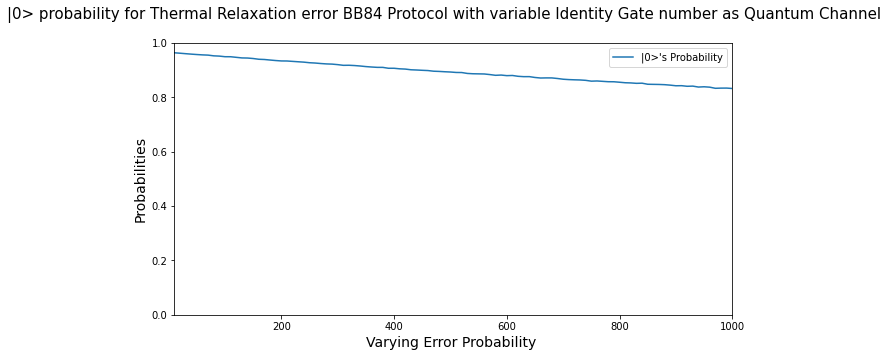

<Figure size 576x360 with 0 Axes>

In [33]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('|0> probability for Thermal Relaxation error BB84 Protocol with variable Identity Gate number as Quantum Channel',fontsize=15)
# naming the x axis
plt.xlabel('Varying Error Probability ',fontsize=14)
# naming the y axis
plt.ylabel('Probabilities',fontsize=14)
# giving a title to my graph
# Set axis ranges; by default this will put major ticks every 25.
#ax.set_xlim(0, 300)
#ax.set_ylim(0, 1)
ax.set_xlim(10, 1000)
ax.set_ylim(0,1)
fig = plt.figure(figsize=(8,5))
# line 2 points
y1=[0.96402587890625, 0.962451171875, 0.960711669921875, 0.95906982421875, 0.957574462890625, 0.956280517578125, 0.95540771484375, 0.952764892578125, 0.951806640625, 0.949554443359375, 0.94945068359375, 0.947259521484375, 0.9450927734375, 0.944677734375, 0.942919921875, 0.94017333984375, 0.939312744140625, 0.937322998046875, 0.935479736328125, 0.93397216796875, 0.933782958984375, 0.93236083984375, 0.930938720703125, 0.929571533203125, 0.927410888671875, 0.926275634765625, 0.9244873046875, 0.923040771484375, 0.92232666015625, 0.920416259765625, 0.917852783203125, 0.91810302734375, 0.9170166015625, 0.915350341796875, 0.913214111328125, 0.91165771484375, 0.91038818359375, 0.91029052734375, 0.90704345703125, 0.907012939453125, 0.905010986328125, 0.9040283203125, 0.901507568359375, 0.900640869140625, 0.899560546875, 0.898638916015625, 0.896234130859375, 0.895428466796875, 0.89422607421875, 0.893255615234375, 0.89163818359375, 0.891326904296875, 0.887994384765625, 0.8868408203125, 0.8864501953125, 0.886016845703125, 0.883837890625, 0.8811279296875, 0.882037353515625, 0.879901123046875, 0.880499267578125, 0.877496337890625, 0.876177978515625, 0.876263427734375, 0.873138427734375, 0.871173095703125, 0.871588134765625, 0.87149658203125, 0.86937255859375, 0.86671142578125, 0.865374755859375, 0.864581298828125, 0.863983154296875, 0.86260986328125, 0.859600830078125, 0.860284423828125, 0.858953857421875, 0.857574462890625, 0.857391357421875, 0.855657958984375, 0.85377197265625, 0.85308837890625, 0.851611328125, 0.8521240234375, 0.8482177734375, 0.8478271484375, 0.84747314453125, 0.84666748046875, 0.844952392578125, 0.842669677734375, 0.842962646484375, 0.84075927734375, 0.841375732421875, 0.83792724609375, 0.8389404296875, 0.83748779296875, 0.833355712890625, 0.833984375, 0.834130859375, 0.832635498046875]
x1=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000]

#plotting the line 2 points
ax.plot(x1, y1, label = "|0>'s Probability")
#ax.axes.xaxis.set_ticks([])
# show a legend on the plot
ax.legend()